# import modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import networkx as nx
import matplotlib.animation as animation

# Not Limited Love

In [302]:
N = 20
# first impression
x = np.random.uniform(-1,1,(N,N))
#  the property of getting influence from their feeling
alpha = np.random.uniform(-0.1,0.1,(N,N))
# the property of getting influence from other's feeling
beta = np.random.uniform(-0.1,0.1,(N,N))
# simulation 
dt = 0.05
Nt = 100
t = np.arange(0, Nt, dt)

x_process = np.zeros((int(Nt/dt),N,N))
for i in range(int(Nt/dt)):
    x += (alpha*x + beta*x.T ) * dt
    x_process[i] = x

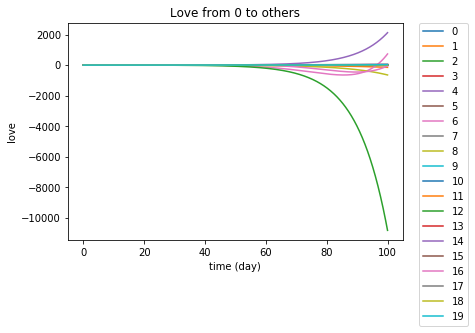

In [303]:
x_list = np.zeros((int(Nt/dt),N))
for i in range(int(Nt/dt)):
    for j in range(N):
        x_list[i][j] = x_process[i][0][j]

for j in range(N):
    plt.plot(t,x_list[:,j],label='{}'.format(j))
plt.xlabel('time (day)')
plt.ylabel('love')
plt.title('Love from 0 to others')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.show()

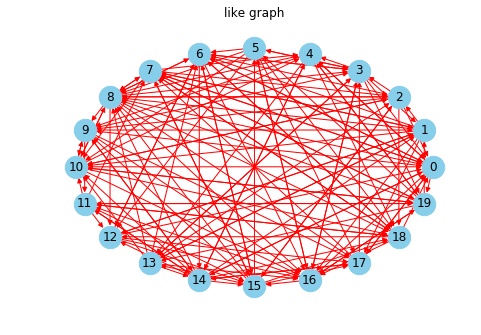

In [304]:
matrix_like = np.zeros((N,N))
matrix_dislike = np.zeros((N,N))
color_like = []
color_dislike = []
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        if abs(x[i,j]) < 0.7:
            pass
        elif x[i,j] < 0:
            matrix_dislike[i,j] = -1
            color_dislike.append('b')
        else:
            matrix_like[i,j] = 1
            color_like.append('r')
            

G_like =nx.from_numpy_matrix(matrix_like,create_using=nx.MultiDiGraph())

nx.draw(G_like, with_labels=True, node_size=500, node_color="skyblue", pos=nx.circular_layout(G), edge_color=color_like)
plt.title("like graph")
plt.show()

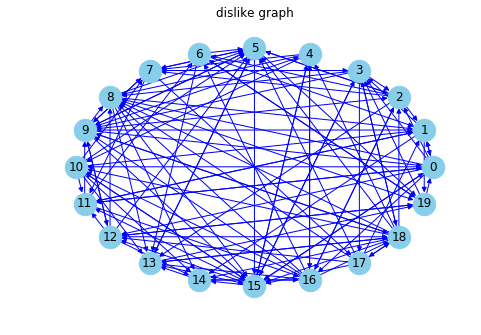

In [305]:
G_dislike =nx.from_numpy_matrix(matrix_dislike,create_using=nx.MultiDiGraph())

nx.draw(G_dislike, with_labels=True, node_size=500, node_color="skyblue", pos=nx.circular_layout(G), edge_color=color_dislike)
plt.title("dislike graph")
plt.show()

# Popularity, Gender, Capacity

In [2]:
N = 20
# first impression
x = np.random.uniform(-1,1,(N,N))

#  the property of getting influence from their feeling
alpha_c = np.random.uniform(-0.05,0.05,(N,N))
alpha_p = np.ones((N,N))
for i in range(N):
    alpha_p[:,i] = alpha_p[:,i] * np.random.uniform(-0.025,0.025)
# alpha_p[:,0] = np.ones(N)*0.4
alpha = alpha_c + alpha_p

# the property of getting influence from other's feeling
beta_c = np.random.uniform(-0.1,0.1,(N,N))
beta_p = np.ones((N,N))
for i in range(N):
    beta_p[:,i] = beta_p[:,i] * np.random.uniform(-0.05,0.05)
beta = beta_c + beta_p

gamma = np.ones((N,N)) * 0.4

# gender
for i in range(N):
    for j in range(N):
        if i < 10 and j < 10:
            x[i,j] = 0
        elif i >= 10 and j >= 10:
            x[i,j] = 0
            
for i in range(N):
    x[i] = x[i]/np.linalg.norm(x[i])

# simulation 
dt = 0.01
Nt = 50
t = np.arange(0, Nt, dt)


x_process = np.zeros((int(Nt/dt),N,N))
amount = np.zeros((N,N))
for i in range(int(Nt/dt)):
    for j in range(N):
        amount[j] = np.ones(N)*np.linalg.norm(x[j])
        
    '''Runge Kutta'''
# k1
#     k1 = alpha*x + beta*x.T + np.sign(x)*gamma*(1-amount)
 
#     # k2
#     x2 = x+dt*k1/2
#     for j in range(N):
#         amount[j] = np.ones(N)*np.linalg.norm(x2[j])
#     k2 = alpha*x2 + beta*x2.T + np.sign(x2)*gamma*(1-amount)
    
#     # k3
#     x3 = x+dt*k2/2
#     for j in range(N):
#         amount[j] = np.ones(N)*np.linalg.norm(x3[j])
#     k3 = alpha*x3 + beta*x3.T + np.sign(x3)*gamma*(1-amount)
    
#     # k4
#     x4 = x+dt*k3
#     for j in range(N):
#         amount[j] = np.ones(N)*np.linalg.norm(x4[j])
#     k4 = alpha*x4 + beta*x4.T + np.sign(x4)*gamma*(1-amount)
    
#     x += dt/6 * (k1+2*k2+2*k3+k4)
    '''Euler'''
    x += (alpha*x + beta*x.T + np.sign(x)*gamma*(1-amount)) * dt
    x_process[i] = x


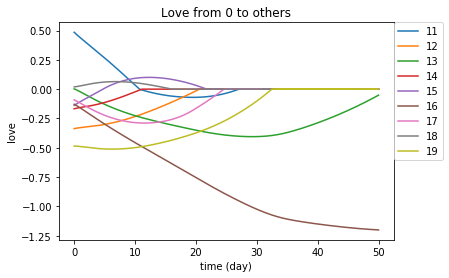

In [3]:
x_list = np.zeros((int(Nt/dt),N))
for i in range(int(Nt/dt)):
    for j in range(N):
        x_list[i][j] = x_process[i][0][j]

for j in range(int(N/2+1),N,1):
    plt.plot(t,x_list[:,j],label='{}'.format(j))
plt.xlabel('time (day)')
plt.ylabel('love')
plt.title('Love from 0 to others')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.savefig('love_from_0.png')
plt.show()

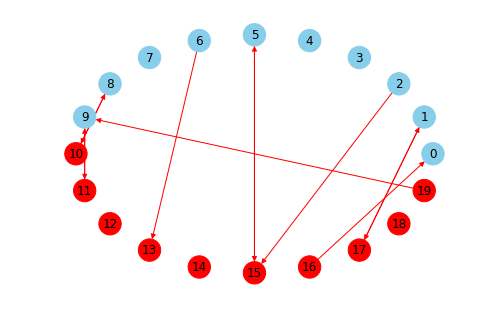

In [4]:
def graph_plot(x):
    matrix_like = np.zeros((N,N))
    matrix_dislike = np.zeros((N,N))
    color_like = []
    color_dislike = []
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if abs(x[i,j]) < 0.7:
                pass
            elif x[i,j] < 0:
                matrix_dislike[i,j] = -1
                color_dislike.append('b')
            else:
                matrix_like[i,j] = 1
                color_like.append('r')


    G_like =nx.from_numpy_matrix(matrix_like,create_using=nx.MultiDiGraph())

    node_color = ['skyblue']*10
    node_color.extend(['r']*10)
    return G, node_color, 
    nx.draw(G_like, with_labels=True, node_size=500, node_color=node_color, pos=nx.circular_layout(G_like), edge_color=color_like)
#     plt.title("relation graph")
#     plt.savefig('relation_graph.png')
#     plt.show()

graph_plot(x)


In [5]:
G_dislike =nx.from_numpy_matrix(matrix_dislike,create_using=nx.MultiDiGraph())

nx.draw(G_dislike, with_labels=True, node_size=500, node_color=node_color, pos=nx.circular_layout(G), edge_color=color_dislike)
plt.title("dislike graph")
plt.show()

NameError: name 'matrix_dislike' is not defined

<IPython.core.display.Javascript object>


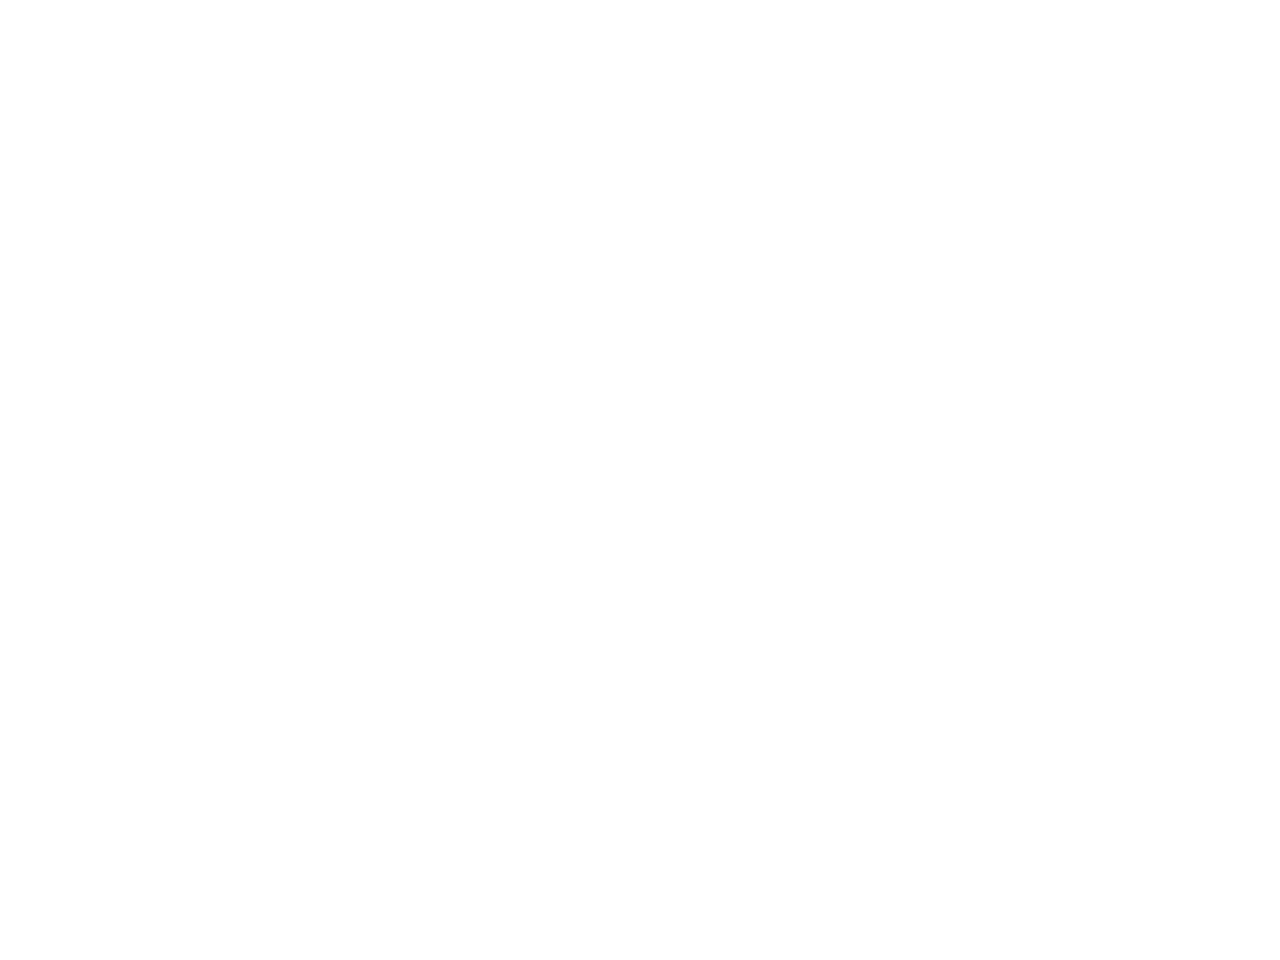

In [9]:
%matplotlib notebook
fig = plt.figure()
def simulation():
    N = 20
    # first impression
    x = np.random.uniform(-1,1,(N,N))

    #  the property of getting influence from their feeling
    alpha_c = np.random.uniform(-0.05,0.05,(N,N))
    alpha_p = np.ones((N,N))
    for i in range(N):
        alpha_p[:,i] = alpha_p[:,i] * np.random.uniform(-0.025,0.025)
    # alpha_p[:,0] = np.ones(N)*0.4
    alpha = alpha_c + alpha_p

    # the property of getting influence from other's feeling
    beta_c = np.random.uniform(-0.1,0.1,(N,N))
    beta_p = np.ones((N,N))
    for i in range(N):
        beta_p[:,i] = beta_p[:,i] * np.random.uniform(-0.05,0.05)
    beta = beta_c + beta_p

    gamma = np.ones((N,N)) * 0.4

    # gender
    for i in range(N):
        for j in range(N):
            if i < 10 and j < 10:
                x[i,j] = 0
            elif i >= 10 and j >= 10:
                x[i,j] = 0

    for i in range(N):
        x[i] = x[i]/np.linalg.norm(x[i])

    # simulation 
    dt = 0.01
    Nt = 50
    t = np.arange(0, Nt, dt)

    x_process = np.zeros((int(Nt/dt),N,N))
    amount = np.zeros((N,N))
    for i in range(int(Nt/dt)):
        for j in range(N):
            amount[j] = np.ones(N)*np.linalg.norm(x[j])

        '''Runge Kutta'''
    # k1
    #     k1 = alpha*x + beta*x.T + np.sign(x)*gamma*(1-amount)

    #     # k2
    #     x2 = x+dt*k1/2
    #     for j in range(N):
    #         amount[j] = np.ones(N)*np.linalg.norm(x2[j])
    #     k2 = alpha*x2 + beta*x2.T + np.sign(x2)*gamma*(1-amount)

    #     # k3
    #     x3 = x+dt*k2/2
    #     for j in range(N):
    #         amount[j] = np.ones(N)*np.linalg.norm(x3[j])
    #     k3 = alpha*x3 + beta*x3.T + np.sign(x3)*gamma*(1-amount)

    #     # k4
    #     x4 = x+dt*k3
    #     for j in range(N):
    #         amount[j] = np.ones(N)*np.linalg.norm(x4[j])
    #     k4 = alpha*x4 + beta*x4.T + np.sign(x4)*gamma*(1-amount)

    #     x += dt/6 * (k1+2*k2+2*k3+k4)
        '''Euler'''
        x += (alpha*x + beta*x.T + np.sign(x)*gamma*(1-amount)) * dt
        x_process[i] = x
        if i%100 == 0:
            graph_plot(x)
# 10枚のプロットを 100ms ごとに表示
ani = animation.FuncAnimation(fig, simulation, interval=100)
plt.show()